In [ ]:
##  Person applies to loans for Education or loan intent...  

# Person Age :- age of person 
# Person Gender:- Male or Female 
# Person Education:-  Associate, Bachelor, Doctorate, High School & Master 
# Person Income:- Monthly Income 
# Person Experience  eg --  2, 3, 5, 10 
# Person Home Ownership  -- MORTGAGE, OTHER, OWN, RENT 
# Person Loan Amount -- 
# Loan intent ---  DEBT CONSOLIDATION, EDUCATION  , HOME IMPROVEMENT, MEDICAL  , PERSONAL, VENTURE 
# Loan intent rate -- 
# Loan Percentage Income -- 
# cb person cred hist length -
# Credit score -- 
# previous loan defaults on file -- 
# loan Status -- 0 / 1

 # Load Necessary Libraries:-

In [1]:

import numpy as np 
import pandas as pd 
import scipy.stats as stats
import seaborn as sns 
import matplotlib.pyplot as plt 
import statistics as s
import joblib

# Load Kaggle Dataset:- 

In [2]:
loan_df = pd.read_csv('loan_data.csv')
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
# size of dataset:- 
loan_df.shape,loan_df.size

((45000, 14), 630000)

In [5]:
loan_df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [5]:
# loan_df.isnull().sum()/loan_df.shape[0] * 100

## info About the DataSet:-

In [6]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
loan_df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [8]:
loan_df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


# Analysis of Data and find more useful data from whole dataset:- 

[Text(0, 0, '15674'), Text(0, 0, '19326')]
[Text(0, 0, '4485'), Text(0, 0, '5515')]


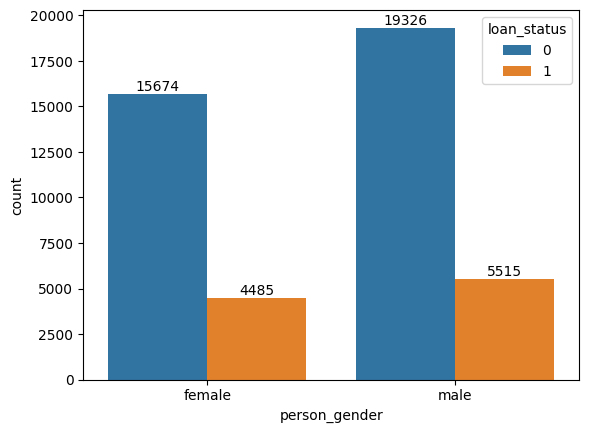

In [9]:
loan_df['person_gender'].value_counts()
data = sns.countplot(x= loan_df['person_gender'],hue=loan_df['loan_status'])
for i in data.containers:
    print(data.bar_label(i))

# # Most Male Candidate apply for Loan and approved its high as compared to female 

In [10]:
loan_df['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

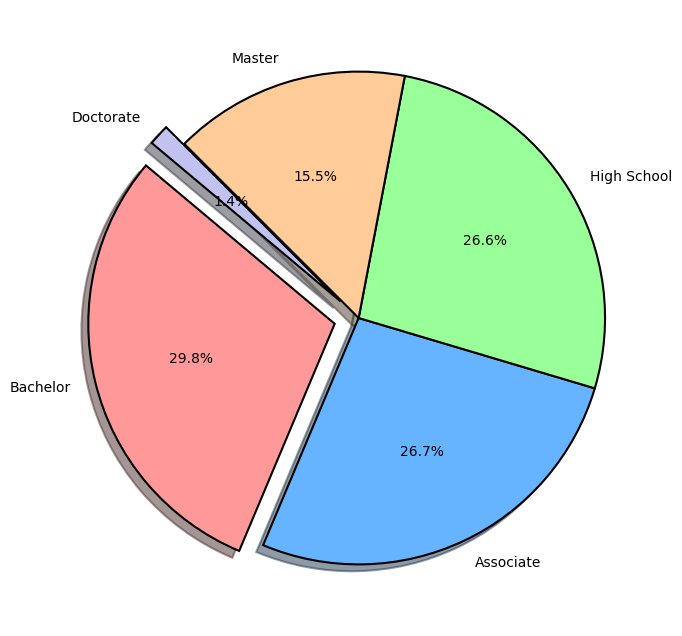

In [11]:
# Count occurrences of each model :-
model_counts = loan_df['person_education'].value_counts()

# Define colors for the pie chart :-
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create pie chart :-
plt.figure(figsize=(8, 8))
plt.pie(
    model_counts, 
    labels=model_counts.index, 
    colors=colors, 
    autopct='%1.1f%%',        # Show percentage on each slice
    startangle=140,           # Start angle for first slice
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},  # Edge color and width
    shadow=True,              # Add shadow for a 3D effect
    explode=(0.1, 0, 0, 0, 0.1)  # Emphasize certain slices
)

# Add title
#plt.title('Person Education Model Distribution')

# Display the chart
plt.show()

[Text(0, 0, '5461'), Text(0, 0, '9301'), Text(0, 0, '10381'), Text(0, 0, '9378'), Text(0, 0, '479')]
[Text(0, 0, '1519'), Text(0, 0, '2671'), Text(0, 0, '3018'), Text(0, 0, '2650'), Text(0, 0, '142')]


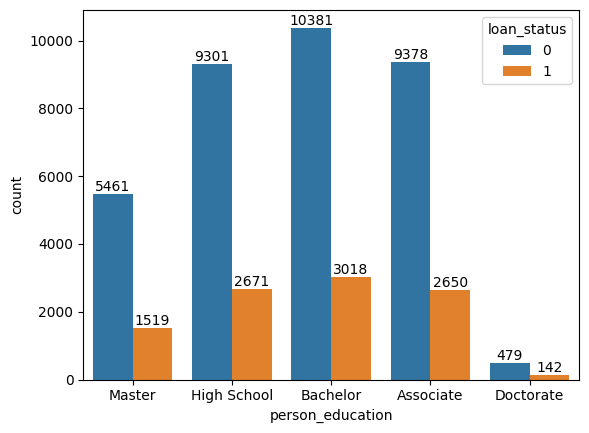

In [12]:
loan_df['person_education'].value_counts()

data = sns.countplot(x= loan_df['person_education'],hue=loan_df['loan_status'])

for i in data.containers:
    print(data.bar_label(i))

[Text(0, 0, '3160'), Text(0, 0, '5341'), Text(0, 0, '6018'), Text(0, 0, '5365'), Text(0, 0, '275')]
[Text(0, 0, '3820'), Text(0, 0, '6631'), Text(0, 0, '7381'), Text(0, 0, '6663'), Text(0, 0, '346')]


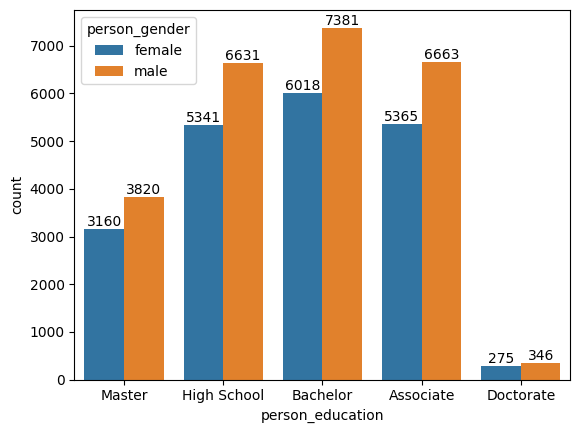

In [13]:
loan_df['person_education'].value_counts()

data = sns.countplot(x= loan_df['person_education'],hue=loan_df['person_gender'])

for i in data.containers:
    print(data.bar_label(i))

## Bachler Degree Male students apply for loans, and loans are approved for male students compared to females. 

In [14]:
loan_df['person_emp_exp'].value_counts()

person_emp_exp
0     9566
2     4134
1     4061
3     3890
4     3524
      ... 
62       1
61       1
58       1
93       1
85       1
Name: count, Length: 63, dtype: int64

[Text(0, 0, '10522'), Text(0, 0, '1312'), Text(0, 0, '8275'), Text(0, 0, '50')]
[Text(0, 0, '12921'), Text(0, 0, '1639'), Text(0, 0, '10214'), Text(0, 0, '67')]


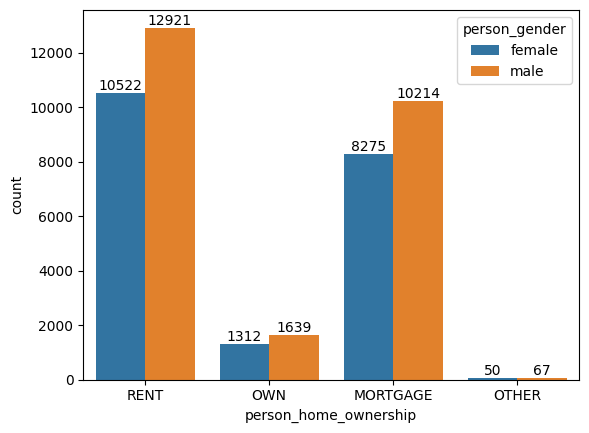

In [15]:
loan_df['person_home_ownership'].value_counts()

data = sns.countplot(x= loan_df['person_home_ownership'],hue=loan_df['person_gender'])

for i in data.containers:
    print(data.bar_label(i))


[Text(0, 0, '15848'), Text(0, 0, '2729'), Text(0, 0, '16345'), Text(0, 0, '78')]
[Text(0, 0, '7595'), Text(0, 0, '222'), Text(0, 0, '2144'), Text(0, 0, '39')]


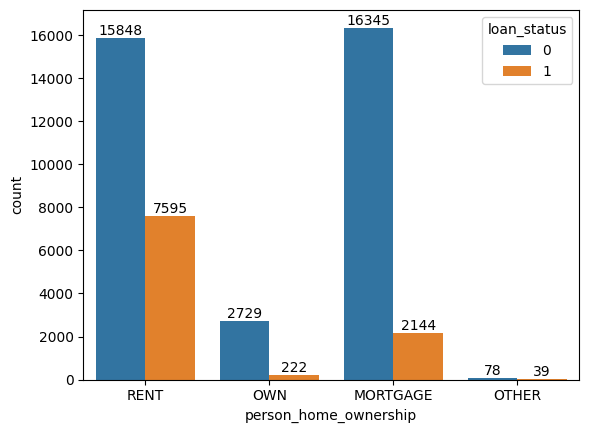

In [16]:
loan_df['person_home_ownership'].value_counts()

data = sns.countplot(x= loan_df['person_home_ownership'],hue=loan_df['loan_status'])

for i in data.containers:
    print(data.bar_label(i))

## Most Students apply for loans who are living on RENT & MORTGAGE and are approved for most loans to the Male...

In [17]:
loan_df['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

[Text(0, 0, '3394'), Text(0, 0, '4079'), Text(0, 0, '3885'), Text(0, 0, '3490'), Text(0, 0, '2140'), Text(0, 0, '3171')]
[Text(0, 0, '4158'), Text(0, 0, '5074'), Text(0, 0, '4663'), Text(0, 0, '4329'), Text(0, 0, '2643'), Text(0, 0, '3974')]


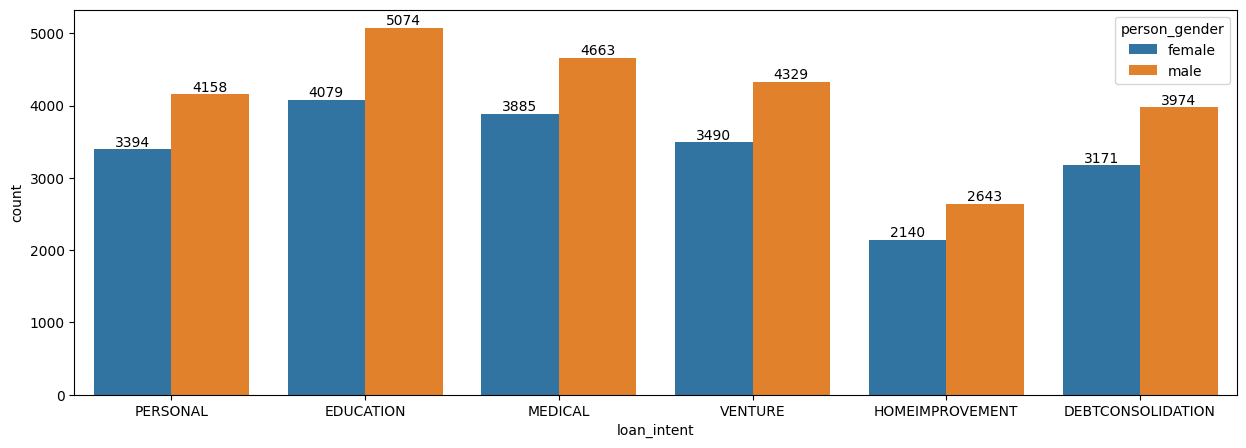

In [18]:
loan_df['loan_intent'].value_counts()
plt.figure(figsize=(15,5))
data = sns.countplot(x= loan_df['loan_intent'],hue=loan_df['person_gender'])

for i in data.containers:
    print(data.bar_label(i))

[Text(0, 0, '6031'), Text(0, 0, '7601'), Text(0, 0, '6170'), Text(0, 0, '6691'), Text(0, 0, '3525'), Text(0, 0, '4982')]
[Text(0, 0, '1521'), Text(0, 0, '1552'), Text(0, 0, '2378'), Text(0, 0, '1128'), Text(0, 0, '1258'), Text(0, 0, '2163')]


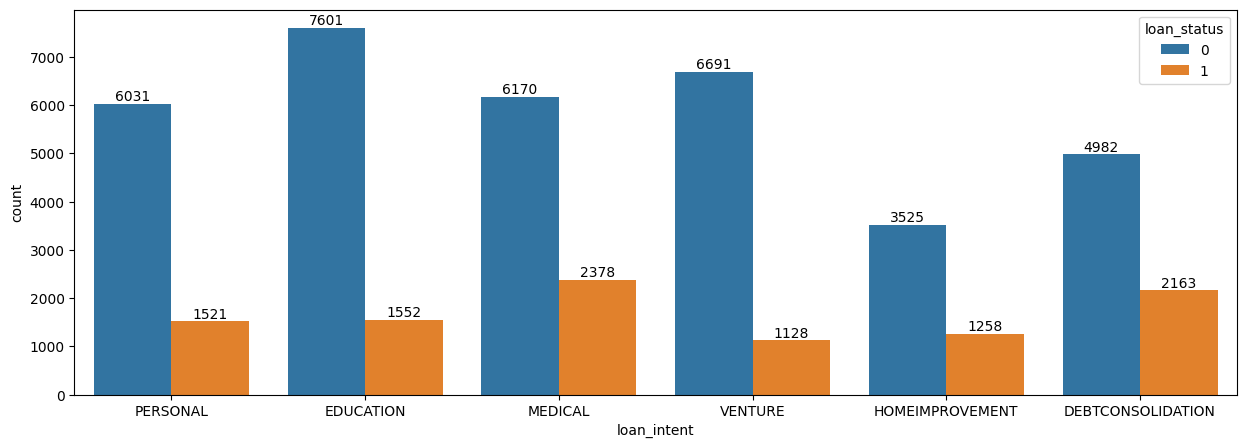

In [19]:
loan_df['loan_intent'].value_counts()
plt.figure(figsize=(15,5))
data = sns.countplot(x= loan_df['loan_intent'],hue=loan_df['loan_status'])

for i in data.containers:
    print(data.bar_label(i))

In [20]:
loan_df['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

In [21]:
loan_df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

<Axes: xlabel='person_age', ylabel='loan_amnt'>

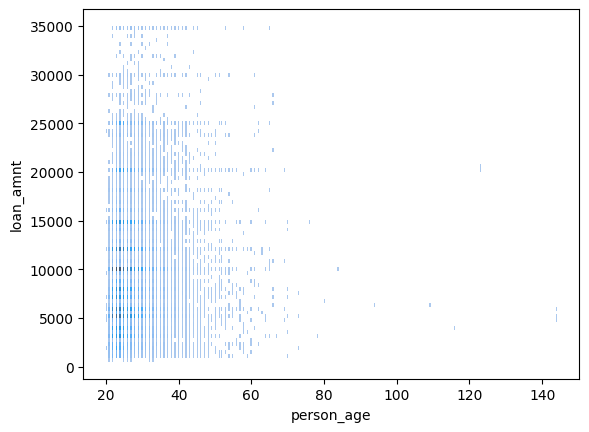

In [22]:
sns.histplot(x='person_age',y='loan_amnt',data=loan_df)

<Axes: xlabel='person_age', ylabel='loan_amnt'>

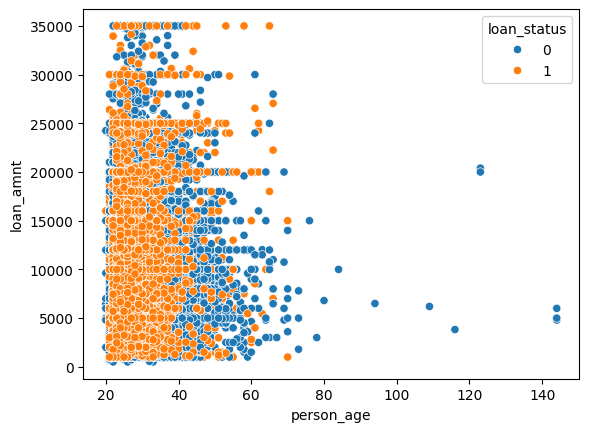

In [23]:
sns.scatterplot(x='person_age',y='loan_amnt',hue='loan_status',data=loan_df)

<Axes: xlabel='person_education', ylabel='loan_amnt'>

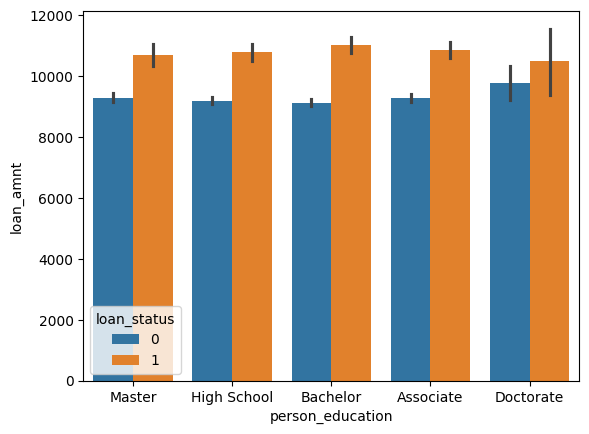

In [24]:
sns.barplot(x='person_education',y='loan_amnt',hue='loan_status',data=loan_df)

<Axes: xlabel='person_education', ylabel='loan_amnt'>

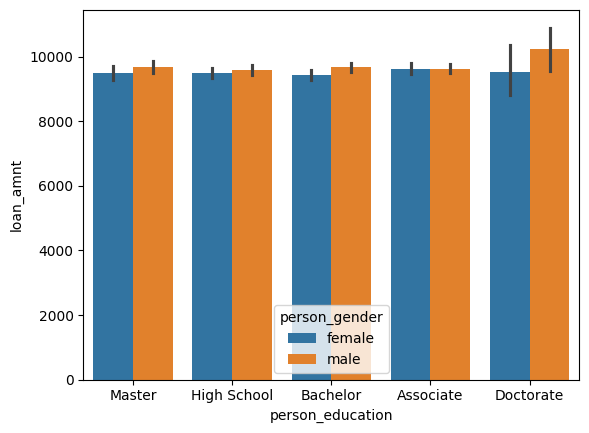

In [25]:
sns.barplot(x='person_education',y='loan_amnt',hue='person_gender',data=loan_df)

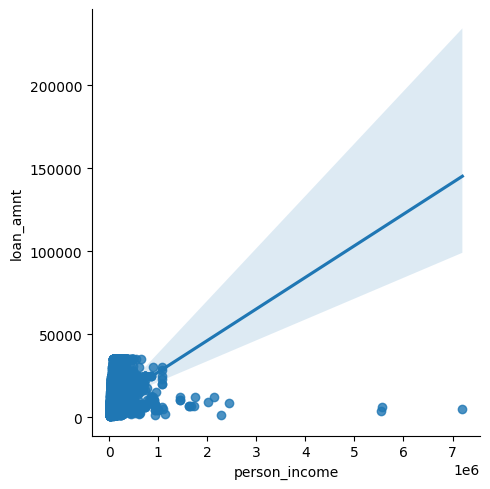

In [26]:
sns.lmplot(x='person_income',y='loan_amnt',data=loan_df)

## Statistics Analaytics:- 

In [27]:
loan_df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


<Axes: ylabel='person_age'>

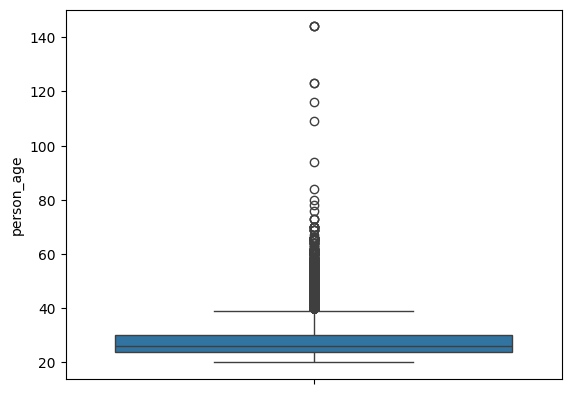

In [28]:
# loan_df['person_age'].value_counts()
sns.boxplot(loan_df['person_age'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_3236\551519360.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df['person_age'])


<Axes: xlabel='person_age', ylabel='Density'>

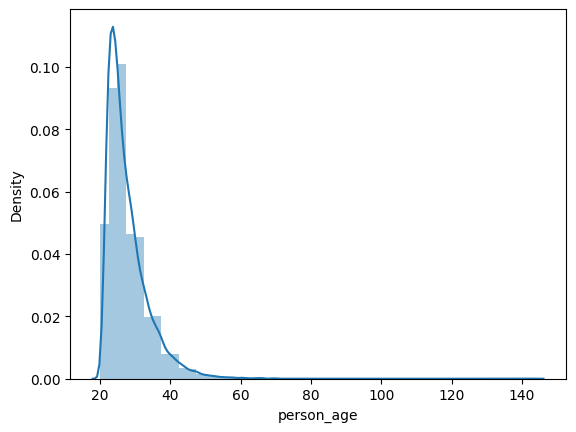

In [29]:
sns.distplot(loan_df['person_age'])

In [3]:
loan_df['person_age'].max(),loan_df['person_age'].min()

(144.0, 20.0)

In [4]:
# 1. IQR Method (Box Plot Method)
Q1 = np.percentile(loan_df['person_age'], 25)
Q3 = np.percentile(loan_df['person_age'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound,upper_bound

(15.0, 39.0)

In [5]:
mean = np.mean(loan_df['person_age'])
std = np.std(loan_df['person_age'])
z_score = 3
# z_score = x-mean/std
lower_bound = mean - z_score * std
upper_bound = mean + z_score * std

lower_bound,upper_bound

(9.629054648458432, 45.89930090709713)

In [6]:
new_df = loan_df[loan_df['person_age']<=60]


In [7]:
new_df.shape,new_df.size

((44922, 14), 628908)

In [8]:
loan_df.shape,loan_df.size

((45000, 14), 630000)

## Feature Extraction :- 

In [9]:
new_df.loan_intent.value_counts()

EDUCATION            9141
MEDICAL              8522
VENTURE              7813
PERSONAL             7527
DEBTCONSOLIDATION    7139
HOMEIMPROVEMENT      4780
Name: loan_intent, dtype: int64

In [10]:
new_df['person_gender'] = pd.Categorical(new_df['person_gender']).codes # Male - 1 or Female - 0

new_df['person_education'] = pd.Categorical(new_df['person_education']).codes
# Associate - 0, Bachelor - 1,Doctorate - 2 , High School - 3 , Master - 4 

new_df['person_home_ownership'] = pd.Categorical(new_df['person_home_ownership']).codes
# MORTGAGE - 0 , OTHER - 1 , OWN - 2, RENT - 3 

new_df['loan_intent'] = pd.Categorical(new_df['loan_intent']).codes
# DEBTCONSOLIDATION - 0 , EDUCATION - 1 , HOMEIMPROVEMENT - 2 , MEDICAL - 3 , PERSONAL - 4 , VENTURE - 5

C:\Users\DELL\AppData\Local\Temp\ipykernel_21924\3270516964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['person_gender'] = pd.Categorical(new_df['person_gender']).codes # Male - 1 or Female - 0
C:\Users\DELL\AppData\Local\Temp\ipykernel_21924\3270516964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['person_education'] = pd.Categorical(new_df['person_education']).codes
C:\Users\DELL\AppData\Local\Temp\ipykernel_21924\3270516964.py:6: SettingWithCopyWarning: 
A value is trying to b

In [11]:
new_df.loan_intent.value_counts()

1    9141
3    8522
5    7813
4    7527
0    7139
2    4780
Name: loan_intent, dtype: int64

## Remove Unnecessary Feature:- 

In [12]:
new_df.drop(['previous_loan_defaults_on_file'],inplace=True,axis=1)
#new_df.drop(['credit_score'],inplace=True,axis=1)
new_df.drop(['cb_person_cred_hist_length'],inplace=True,axis=1)
new_df.drop(['loan_int_rate'],inplace=True,axis=1)
new_df.drop(['loan_percent_income'],inplace=True,axis=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21924\2805707891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['previous_loan_defaults_on_file'],inplace=True,axis=1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21924\2805707891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['cb_person_cred_hist_length'],inplace=True,axis=1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_21924\2805707891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [13]:
new_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,credit_score,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,561,1
1,21.0,0,3,12282.0,0,2,1000.0,1,504,0
2,25.0,0,3,12438.0,3,0,5500.0,3,635,1
3,23.0,0,1,79753.0,0,3,35000.0,3,675,1
4,24.0,1,4,66135.0,1,3,35000.0,3,586,1


In [13]:
## Testing Calculation : - 
(35000 * 16.02 )/ 100

5607.0

<Axes: >

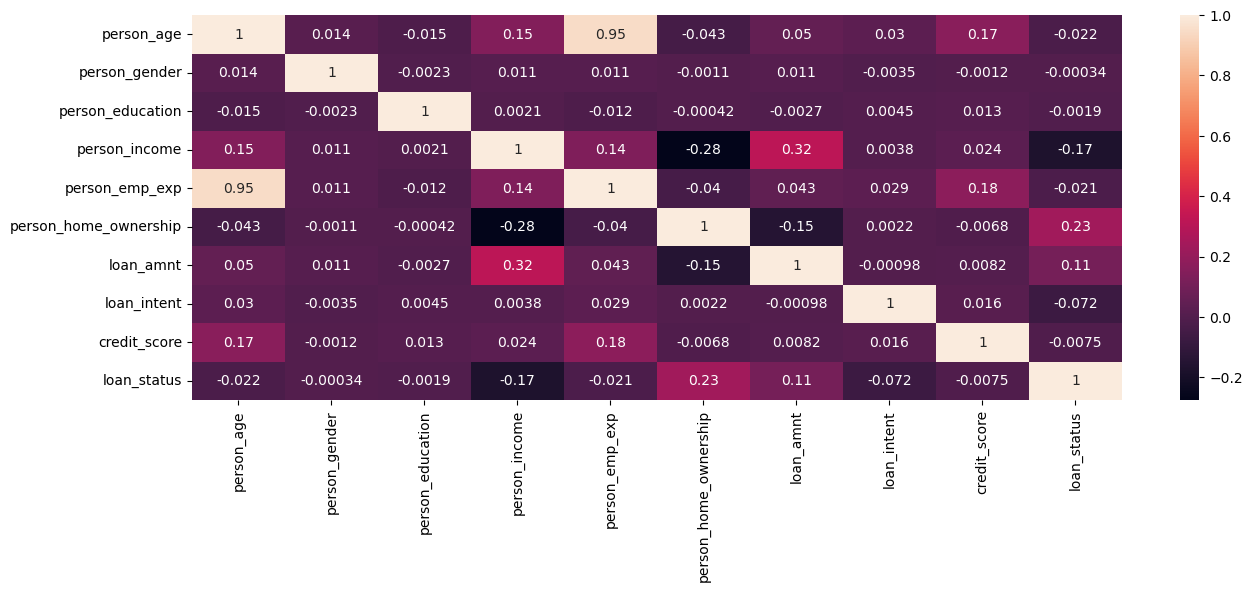

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(new_df.corr(),annot=True)

In [16]:
loan_df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [15]:
loan_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [16]:
# loan_df.columns

## LOAD Machine Learning Or Prediciton or Advacned Libraries:- 

In [17]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,LinearRegression
from sklearn.model_selection import cross_val_score,KFold,train_test_split , GridSearchCV , cross_val_predict , cross_validate
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix,accuracy_score,mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor,kneighbors_graph,KNeighborsTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import *
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import *
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import sys
import scipy
import matplotlib
import sklearn

In [18]:
new_df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,credit_score,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,561,1
1,21.0,0,3,12282.0,0,2,1000.0,1,504,0
2,25.0,0,3,12438.0,3,0,5500.0,3,635,1
3,23.0,0,1,79753.0,0,3,35000.0,3,675,1
4,24.0,1,4,66135.0,1,3,35000.0,3,586,1


# Divided Dataset into Feature or Target Variavle:- 

In [18]:
new_df.drop(['credit_score'],axis=1,inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21924\440150656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['credit_score'],axis=1,inplace=True)


In [19]:
X = new_df.drop(['loan_status'],axis=1)
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent
0,22.0,0,4,71948.0,0,3,35000.0,4
1,21.0,0,3,12282.0,0,2,1000.0,1
2,25.0,0,3,12438.0,3,0,5500.0,3
3,23.0,0,1,79753.0,0,3,35000.0,3
4,24.0,1,4,66135.0,1,3,35000.0,3
...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3
44996,37.0,0,0,65800.0,17,3,9000.0,2
44997,33.0,1,0,56942.0,7,3,2771.0,0
44998,29.0,1,1,33164.0,4,3,12000.0,1


In [20]:
y = new_df[['loan_status']]
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
44995,1
44996,1
44997,1
44998,1


In [255]:
print('Python: {}'.format(sys.version))
print('Scipy: {}'.format(scipy.__version__))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.13.0 (tags/v3.13.0:60403a5, Oct  7 2024, 09:38:07) [MSC v.1941 64 bit (AMD64)]
Scipy: 1.14.1
Numpy: 2.1.2
Pandas: 2.2.3
Matplotlib: 3.9.2
Seaborn: 0.13.2
Sklearn: 1.5.2


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

In [257]:
models=[]
#models.append(('LinearRegression:',LinearRegression()))
models.append(('LR:',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA:',LinearDiscriminantAnalysis()))
models.append(('KNN:',KNeighborsClassifier()))
models.append(('DTC(CART:)',DecisionTreeClassifier()))
models.append(('RFC: ',RandomForestClassifier(n_estimators=100)))
models.append(('NB:',GaussianNB()))
models.append(('Perceptron',Perceptron()))
models.append(('SVC',SVC())) # gamma='auto'

In [23]:
seed = 41 # 6
scoring = 'accuracy'

## Divided Target and feature Variable into train and test split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=seed) # stratify=None

In [25]:
X_train.size,X_test.size

(287496, 71880)

In [26]:
y_train.size,y_test.size

(35937, 8985)

In [263]:
results =[]
names = []
for name,model in models:
    kfold = KFold(n_splits = 5, random_state = seed,shuffle=True)
    # n_splits = min(10, len(X_train))
    # kfold = KFold(n_splits=n_splits, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model,X_train,y_train,cv= kfold,scoring =scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\line

LR: : 0.801653 (0.003142)


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


LDA: : 0.796338 (0.002770)


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: Data

KNN: : 0.833431 (0.001947)
DTC(CART:) : 0.825222 (0.003013)


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionW

RFC:  : 0.872555 (0.002870)
NB: : 0.788296 (0.003046)
Perceptron : 0.672337 (0.227138)


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConve

SVC : 0.807719 (0.003268)


In [27]:
#  RFC:  : 0.875782 (0.003616)

# comparing Algorithms and select the best model 

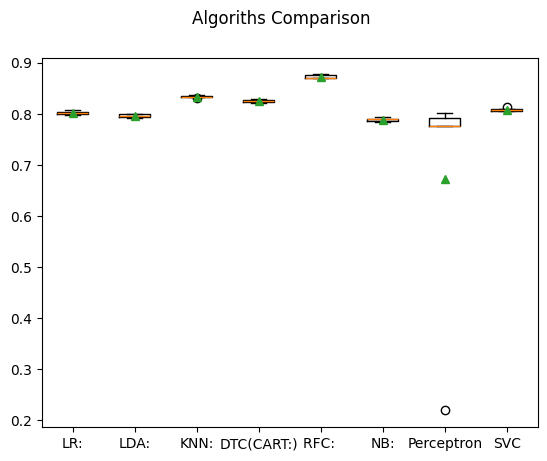

In [264]:
fig = plt.figure()
fig.suptitle('Algoriths Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,showmeans=True)
ax.set_xticklabels(names)
plt.show()

##  RandomForestClassifier score is high when compared to all other 

## Apply Kfold Validation with 5 splits

In [27]:
# Set up K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=41)

## Build RandomForestClassifier:- 

In [28]:
# Initialize the model
#model = RandomForestClassifier(n_estimators=100, random_state=6)

# Initialize the model with potential hyperparameter tuning
model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    max_depth=None,  # You can adjust these hyperparameters
    min_samples_split=2,
    min_samples_leaf=1,
    #ccp_alpha  = 0.0
)

In [29]:
scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

## Perform Cross-validation for check model accuracy:-

In [30]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision_macro')

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

In [269]:
# #Print the cross-validation results
# print("Cross-validation scores:", cv_scores)
# print("Mean CV Score: {:.4f} (+/- {:.4f})".format(cv_scores.mean(), cv_scores.std() * 2))

In [31]:
# Display results
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validation Scores: [0.87544988 0.87341429 0.866328   0.85941979 0.8720585 ]
Mean Accuracy: 0.8693340928266624
Standard Deviation: 0.005810393421586121


In [62]:
for i in scoring:
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=i)
    print(cv_scores)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionW

[0.87757373 0.87618253 0.87866982 0.87046055 0.87505218]


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionW

[0.89170468 0.88208227 0.87486451 0.87099471 0.88945796]


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionW

[0.74499235 0.7399295  0.75051606 0.73656023 0.7408728 ]


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionW

[0.78748692 0.78162002 0.78980898 0.77607829 0.78313368]


In [32]:
# Comprehensive cross-validation
cv_results = cross_validate(
    model, 
    X_train, y_train, 
    cv=kfold, 
    scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was pa

In [33]:
# Print detailed cross-validation results
print("Cross-Validation Metrics:")
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric.replace('test_', '')}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

Cross-Validation Metrics:
accuracy: 0.8715 (+/- 0.0061)
precision_macro: 0.8693 (+/- 0.0116)
recall_macro: 0.7386 (+/- 0.0079)
f1_macro: 0.7777 (+/- 0.0083)


In [34]:
cv_results

{'fit_time': array([4.44486189, 4.90589905, 4.01717329, 4.05186152, 4.1756289 ]),
 'score_time': array([0.21589947, 0.23087955, 0.21258807, 0.16572332, 0.16934395]),
 'test_accuracy': array([0.87145242, 0.87479132, 0.8747739 , 0.86698205, 0.86934743]),
 'test_precision_macro': array([0.87544988, 0.87341429, 0.866328  , 0.85941979, 0.8720585 ]),
 'test_recall_macro': array([0.73752406, 0.74131787, 0.74481125, 0.73409817, 0.73522334]),
 'test_f1_macro': array([0.77769906, 0.78127854, 0.78305972, 0.77170117, 0.77485653])}

## Apply Cross-validation for model Prediction:- 

In [274]:
# Perform Cross-Validated Predictions
cv_predictions = cross_val_predict(
    estimator=model, 
    X=X_train, 
    y=y_train, 
    cv=kfold,
)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionW

In [41]:
from sklearn.metrics import precision_score, recall_score , f1_score

In [35]:
# Comprehensive Model Evaluation
def evaluate_predictions(y_true, y_pred):
    results = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (Macro)': precision_score(y_true, y_pred, average='binary'),
        'Recall (Macro)': recall_score(y_true, y_pred, average='binary'),
        'F1 Score (Macro)': f1_score(y_true, y_pred, average='binary')
    }
    return results

# {'weighted', 'macro', 'micro', 'samples', 'binary'}
# ValueError: Samplewise metrics are not available outside of multilabel classification. for samples

In [277]:
# Compute evaluation metrics
evaluation_metrics = evaluate_predictions(y_train, cv_predictions)

In [278]:
evaluation_metrics

{'Accuracy': 0.8714695160976152,
 'Precision (Macro)': np.float64(0.8662323561346362),
 'Recall (Macro)': np.float64(0.4991241241241241),
 'F1 Score (Macro)': np.float64(0.633325394935302)}

In [279]:
print("Cross-Validation Prediction Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")

Cross-Validation Prediction Metrics:
Accuracy: 0.8715
Precision (Macro): 0.8662
Recall (Macro): 0.4991
F1 Score (Macro): 0.6333


In [280]:
# Detailed Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_train, cv_predictions))


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     27945
           1       0.87      0.50      0.63      7992

    accuracy                           0.87     35937
   macro avg       0.87      0.74      0.78     35937
weighted avg       0.87      0.87      0.86     35937



In [281]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_train, cv_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[27329   616]
 [ 4003  3989]]


In [282]:
print("Mean Absolute Error:",mean_absolute_error(y_train, cv_predictions) * 100)
print("Mean Squared Error:",mean_squared_error(y_train, cv_predictions)*100)
print("R2 Score:",r2_score(y_train, cv_predictions) * 100)

Mean Absolute Error: 12.853048390238472
Mean Squared Error: 12.853048390238472
R2 Score: 25.675808658900458


In [283]:
cv_predictions

array([0, 1, 0, ..., 0, 0, 0])

## Standarization Technique :- 


In [284]:
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

## Final Model Training and Prediction

In [37]:
# Fit the model on the full training set after cross-validation
model.fit(X_train, y_train)
final_predictions = model.predict(X_test)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21924\465458599.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [38]:
final_predictions

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [39]:
# Function to evaluate predictions
def evaluate_predictions(y_true, y_pred):
    results = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision (Macro)': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Recall (Macro)': recall_score(y_true, y_pred, average='macro', zero_division=0),
        'F1 Score (Macro)': f1_score(y_true, y_pred, average='macro', zero_division=0)
    }
    return results

In [42]:
performance_metrics = evaluate_predictions(y_test, final_predictions)
        
print("New Data Prediction Metrics:")
for metric, value in performance_metrics.items():
    print(f"{metric}: {value:.4f}")

New Data Prediction Metrics:
Accuracy: 0.8711
Precision (Macro): 0.8698
Recall (Macro): 0.7358
F1 Score (Macro): 0.7754


In [46]:
accuracy = model.score(X_test, y_test)
accuracy

0.8711185308848081

In [43]:
# # Predict on test set
# y_pred = model.predict(X_test)

# Final Model Evaluation
final_evaluation = evaluate_predictions(y_test, final_predictions)
print("\nFinal Model Evaluation on Test Set:")
for metric, value in final_evaluation.items():
    print(f"{metric}: {value:.4f}")


Final Model Evaluation on Test Set:
Accuracy: 0.8711
Precision (Macro): 0.8698
Recall (Macro): 0.7358
F1 Score (Macro): 0.7754


In [44]:
# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, final_predictions))


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6995
           1       0.87      0.49      0.63      1990

    accuracy                           0.87      8985
   macro avg       0.87      0.74      0.78      8985
weighted avg       0.87      0.87      0.86      8985



In [47]:
# Final Accuracy report 
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Final Test Accuracy: {final_accuracy:.4f}")

Final Test Accuracy: 0.8711


In [48]:
print("Mean Absolute Error:",mean_absolute_error(y_test, final_predictions) * 100)

Mean Absolute Error: 12.888146911519199


In [49]:
print("Mean Squared Error:",mean_squared_error(y_test, final_predictions)*100)

Mean Squared Error: 12.888146911519199


In [50]:
print("R2 Score:",r2_score(y_test, final_predictions))

R2 Score: 0.25254363310476613


In [57]:
y_pred1 = model.predict(X_test)
y_pred1

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [59]:
# sns.displot(y_pred1-y_test,kde = True,color='red')

In [51]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, final_predictions) # TP + TN / All
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[6846  149]
 [1009  981]]


In [52]:
# Feature Importance (if applicable)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [53]:
print("\nTop 10 Most Important Features:")
# print(feature_importance.head(10))
feature_importance


Top 10 Most Important Features:


,feature,importance
3,person_income,0.376830
6,loan_amnt,0.245555
0,person_age,0.095315
4,person_emp_exp,0.086241
5,person_home_ownership,0.074642
7,loan_intent,0.063318
2,person_education,0.041315
1,person_gender,0.016784


<Figure size 1000x600 with 0 Axes>

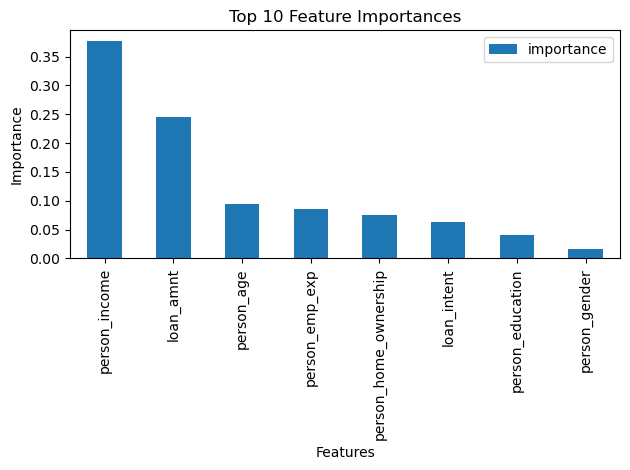

In [60]:
# Optional: Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='bar', x='feature', y='importance')
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [61]:
# Predict on new data
new_predictions = model.predict(X_test)
new_pred_proba = model.predict_proba(X_test)
new_pred_proba

array([[0.89, 0.11],
       [0.91, 0.09],
       [0.95, 0.05],
       ...,
       [0.11, 0.89],
       [0.13, 0.87],
       [0.69, 0.31]])

In [64]:
#X_test
X_test.size

71880

In [302]:
#y_test
y_test.size

8985

In [334]:
new_data_scale = scale.transform([[23.0,1,0,144405.0,1,0,8000.0,2]]) # 559
new_data_scale

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.81880006,  0.9034337 , -1.17675841,  1.03367435, -0.75613682,
        -1.17759478, -0.25034937, -0.30277754]])

In [335]:
model.predict(new_data_scale)

array([0])

## Using ML PipeLine:- 

In [65]:
from sklearn.pipeline import Pipeline

In [66]:
# Create a pipeline with scaling and classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=100, 
        random_state=42
    ))
])

In [67]:
# Perform cross-validated predictions on training data
cv_predictions_train = cross_val_predict(
    estimator=pipeline, 
    X=X_train, 
    y=y_train, 
    cv=kfold
)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

In [68]:
# Evaluate cross-validation predictions on training data
print("Cross-Validation Metrics on Training Data:")
print("Accuracy:", accuracy_score(y_train, cv_predictions_train))
print("Precision (Macro):", precision_score(y_train, cv_predictions_train, average='macro'))
print("Recall (Macro):", recall_score(y_train, cv_predictions_train, average='macro'))
print("F1 Score (Macro):", f1_score(y_train, cv_predictions_train, average='macro'))

Cross-Validation Metrics on Training Data:
Accuracy: 0.87163647494226
Precision (Macro): 0.8694063636455398
Recall (Macro): 0.7389157877684448
F1 Score (Macro): 0.7780735411565687


In [69]:
# Detailed Classification Report for Training Data
print("\nDetailed Classification Report (Training Data):")
print(classification_report(y_train, cv_predictions_train))


Detailed Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     27945
           1       0.87      0.50      0.63      7992

    accuracy                           0.87     35937
   macro avg       0.87      0.74      0.78     35937
weighted avg       0.87      0.87      0.86     35937



In [70]:
confusion_matrix(y_train, cv_predictions_train)

array([[27329,   616],
       [ 3997,  3995]], dtype=int64)

In [71]:
# Predict on test data
pipeline.fit(X_train, y_train)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [72]:
# Predictions on test data
test_predictions = pipeline.predict(X_test)

In [73]:
print("\nTest Data Prediction Metrics:")
print("Accuracy:", accuracy_score(y_test, test_predictions))
print("Precision (Macro):", precision_score(y_test, test_predictions, average='macro'))
print("Recall (Macro):", recall_score(y_test, test_predictions, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, test_predictions, average='macro'))


Test Data Prediction Metrics:
Accuracy: 0.8718976071229827
Precision (Macro): 0.8711952228315631
Recall (Macro): 0.7372311881063646
F1 Score (Macro): 0.7769600226505036


In [74]:
print("\nDetailed Classification Report (Test Data):")
print(classification_report(y_test, test_predictions))


Detailed Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6995
           1       0.87      0.50      0.63      1990

    accuracy                           0.87      8985
   macro avg       0.87      0.74      0.78      8985
weighted avg       0.87      0.87      0.86      8985



In [75]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))


Confusion Matrix:
[[6848  147]
 [1004  986]]


In [76]:
# Feature Importance
feature_importances = pipeline.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

In [77]:
print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))


Top 10 Most Important Features:
                 Feature  Importance
3          person_income    0.376830
6              loan_amnt    0.245555
0             person_age    0.095315
4         person_emp_exp    0.086241
5  person_home_ownership    0.074642
7            loan_intent    0.063318
2       person_education    0.041315
1          person_gender    0.016784


In [78]:
X_test

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent
32402,52.0,0,3,43018.0,28,3,6000.0,4
28634,33.0,1,3,133080.0,11,3,10000.0,5
9200,24.0,0,0,72814.0,1,0,2800.0,5
38825,28.0,1,1,60893.0,3,0,20000.0,2
25175,32.0,1,0,48636.0,10,3,12000.0,0
...,...,...,...,...,...,...,...,...
28964,28.0,1,3,67987.0,5,0,8400.0,1
15383,23.0,1,0,144405.0,1,0,8000.0,2
14545,22.0,1,1,41670.0,3,3,15000.0,5
31190,36.0,1,3,41118.0,16,3,12000.0,1


In [79]:
y_test

,loan_status
32402,0
28634,0
9200,0
38825,0
25175,0
...,...
28964,0
15383,1
14545,1
31190,1


In [80]:
pipeline.predict([[23.0,1,0,144405.0,1,0,8000.0,2]])

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [81]:
pipeline.predict([[24.0,0,0,72814.0,1,0,2800.0,5]])

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [83]:
filepath='models/trained_model.pkl'

In [84]:
"""
Save trained model and scaler
"""
joblib.dump({
    'model': model,
    'pipeline': pipeline
}, filepath)

['models/trained_model.pkl']

In [87]:
predictor = joblib.load(filepath)
predictor

{'model': RandomForestClassifier(random_state=42),
 'pipeline': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', RandomForestClassifier(random_state=42))])}

In [92]:
#predictor['model'].predict([[24.0,0,0,72814.0,1,0,2800.0,5]])
predictor['model'].predict([[23.0,1,0,144405.0,1,0,8000.0,2]])

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [93]:
#predictor['pipeline'].predict([[24.0,0,0,72814.0,1,0,2800.0,5]])
predictor['pipeline'].predict([[23.0,1,0,144405.0,1,0,8000.0,2]])

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [45]:
# 1. Basic Random Forest with L1/L2 Regularization
rf_l1_params = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'ccp_alpha': [0.0, 0.001, 0.01]  # Cost Complexity Pruning (built-in regularization)
}

In [46]:
# Create a pipeline with scaling and Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [47]:
# # GridSearchCV for hyperparameter tuning and regularization
# grid_search = GridSearchCV(
#     estimator=rf_pipeline,
#     param_grid={
#         'classifier__' + k: v for k, v in rf_l1_params.items()
#     },
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1
# )

# # Fit GridSearch
# grid_search.fit(X_train, y_train)

# # Best model and parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# print("Best Parameters:", best_params)
# print("Best Cross-validated Score:", grid_search.best_score_)

# Ensemble Regularization Techniques
# Combining multiple regularization approaches

In [1]:
# Bagging with different regularization parameters
def create_regularized_models():
    models = [
        RandomForestClassifier(
            n_estimators=100,
            max_depth=depth,
            min_samples_split=split,
            min_samples_leaf=leaf,
            max_features=features,
            random_state=42
        )
        for depth in [None, 10, 20,30]
        for split in [2, 5, 10]
        for leaf in [1, 2,4]
        for features in ['sqrt', 'log2']
    ]
    return models


In [31]:
# Voting Classifier for ensemble regularization
from sklearn.ensemble import VotingClassifier

In [32]:
# Create an ensemble of regularized models
ensemble_models = create_regularized_models()
voting_classifier = VotingClassifier(
    estimators=[(f'model_{i}', model) for i, model in enumerate(ensemble_models)],
    voting='soft'
)

In [33]:
# Fit and evaluate voting classifier
voting_classifier.fit(X_train, y_train)
voting_score = voting_classifier.score(X_test, y_test)
print("\nEnsemble Voting Classifier Score:", voting_score)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)



Ensemble Voting Classifier Score: 0.8750139120756817


In [34]:
y_pred = voting_classifier.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [36]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred) # TP + TN / All
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[6907   88]
 [1035  955]]


In [37]:
# 3. Feature Selection with Regularization
from sklearn.feature_selection import SelectFromModel

In [38]:
# Feature selection with L1 regularization
selector = SelectFromModel(
    RandomForestClassifier(
        n_estimators=100, 
        max_depth=10, 
        random_state=42
    ), 
    prefit=False
)

In [41]:
# Create a pipeline with feature selection and classifier
feature_selection_pipeline = Pipeline([
    ('selector', selector),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [42]:
# Grid search with feature selection
feature_selection_grid = GridSearchCV(
    estimator=feature_selection_pipeline,
    param_grid={
        'selector__max_features': [None, 'sqrt', 'log2'],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    cv=5,
    scoring='accuracy'
)

In [43]:
feature_selection_grid.fit(X_train, y_train)
print("\nFeature Selection Best Score:", feature_selection_grid.best_score_)
print("Feature Selection Best Parameters:", feature_selection_grid.best_params_)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1473: DataConversionW


Feature Selection Best Score: 0.871274802189912
Feature Selection Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 50, 'selector__max_features': None}


In [ ]:
# Bonus: Regularization Performance Comparison
regularization_methods = {
    'Basic Random Forest': RandomForestClassifier(random_state=42),
    #'GridSearch Regularized': best_model,
    'Voting Ensemble': voting_classifier,
    'Feature Selection': feature_selection_grid.best_estimator_
}

In [ ]:
print("\nRegularization Method Comparison:")
for name, model in regularization_methods.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

In [96]:
X_test[100:]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,credit_score
38972,25.0,1,3,55184.0,4,3,12389.0,0,594
18971,29.0,1,1,128951.0,5,3,15000.0,0,570
10628,21.0,0,4,44152.0,0,3,10000.0,1,494
14526,26.0,0,0,131747.0,5,0,20000.0,0,541
3909,23.0,1,3,50147.0,1,3,4000.0,3,672
...,...,...,...,...,...,...,...,...,...
28964,28.0,1,3,67987.0,5,0,8400.0,1,611
15383,23.0,1,0,144405.0,1,0,8000.0,2,684
14545,22.0,1,1,41670.0,3,3,15000.0,5,585
31190,36.0,1,3,41118.0,16,3,12000.0,1,575


In [97]:
y_test[100:]

,loan_status
38972,0
18971,0
10628,0
14526,0
3909,0
...,...
28964,0
15383,1
14545,1
31190,1


In [ ]:
# X_test.index[33344]
# s = '24.0	0	4	65471.0	0	0	5000.0	1	639'
# print(s.strip().split(' '))

In [98]:
model.predict([[21.0,0,0,71339.0,0,0,5000.0,1,559]])

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

##   More Info:- 

In [ ]:
# # Set up k-fold cross-validation
# kf = KFold(n_splits=5, shuffle=True, random_state=seed)  # 5 folds

# # Custom function to calculate multiple metrics
# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []

# # Cross-validation loop
# for train_index, test_index in kf.split(X_train):
#     X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
#     y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
#     # Train the model
#     model.fit(X_train_fold, y_train_fold)
    
#     # Predict on the validation fold
#     y_pred = model.predict(X_test_fold)
    
#     # Evaluate and store metrics
#     accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
#     precision_scores.append(precision_score(y_test_fold, y_pred, average='weighted'))
#     recall_scores.append(recall_score(y_test_fold, y_pred, average='weighted'))
#     f1_scores.append(f1_score(y_test_fold, y_pred, average='weighted'))

# # Display detailed results
# print("Cross-Validation Results:")
# print(f"Mean Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
# print(f"Mean Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
# print(f"Mean Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
# print(f"Mean F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

In [ ]:
# # Train the model on the entire dataset
# model.fit(X_train, y_train)

# # Final evaluation on a test set (if available)
# y_test_pred = model.predict(X_test)
# final_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"Final Test Accuracy: {final_accuracy:.4f}")